<a href="https://colab.research.google.com/github/sar9ho/phishing1/blob/main/Phishing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
import nltk
from nltk.corpus import words
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.model_selection import GridSearchCV
sns.set()

from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

# Loading the goodreads data set from google drive
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1txKJGea-FZTTfCkP8byK8AiQusQkGru4RAcMS_wkfNU/edit#gid=739934149')
sheet = wb.worksheet('spam')
data = sheet.get_all_values()

# Assigning the goodreads data set to a dataframe
df = pd.DataFrame(data)

df.columns = df.iloc[0]
df = df.iloc[1:]
df.head(5572)

#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)
#path = '/content/drive/My Drive/Spam Data/'


,Class,Text,,,
1,0,"Go until jurong point, crazy.. Available only ...",,,
2,0,Ok lar... Joking wif u oni...,,,
3,1,Free entry in 2 a wkly comp to win FA Cup fina...,,,
4,0,U dun say so early hor... U c already then say...,,,
5,0,"Nah I don't think he goes to usf, he lives aro...",,,
...,...,...,...,...,...
5568,1,This is the 2nd time we have tried 2 contact u...,,,
5569,0,Will �_ b going to esplanade fr home?,,,
5570,0,"Pity, * was in mood for that. So...any other s...",,,
5571,0,The guy did some bitching but I acted like i'd...,,,


In [ ]:
df['Class'].value_counts(normalize=True)

0    0.865937
1    0.134063
Name: Class, dtype: float64

In [ ]:
data_randomized = df.sample(frac=1, random_state=1)

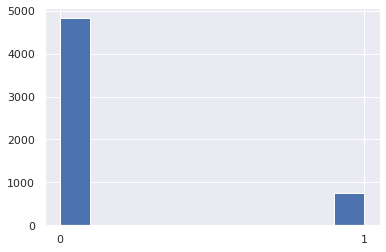

In [ ]:
df["Class"].hist()

In [ ]:
df.head(5572)

,Class,Text,,,
1,0,"Go until jurong point, crazy.. Available only ...",,,
2,0,Ok lar... Joking wif u oni...,,,
3,1,Free entry in 2 a wkly comp to win FA Cup fina...,,,
4,0,U dun say so early hor... U c already then say...,,,
5,0,"Nah I don't think he goes to usf, he lives aro...",,,
...,...,...,...,...,...
5568,1,This is the 2nd time we have tried 2 contact u...,,,
5569,0,Will �_ b going to esplanade fr home?,,,
5570,0,"Pity, * was in mood for that. So...any other s...",,,
5571,0,The guy did some bitching but I acted like i'd...,,,


In [ ]:
x = df["Text"]
y = df["Class"]

x_train, y_train = x[0:4457], y[0:4457]
x_test, y_test = x[4457:], y[4457:]

In [ ]:
df["Class"].value_counts(normalize=True)


0    0.865937
1    0.134063
Name: Class, dtype: float64

In [ ]:
df['Text'] = df['Text'].str.replace(
   '\W', ' ') # Removes punctuation
df['Text'] = df['Text'].str.lower()
df.head(3)

,Class,Text,,,
1,0,go until jurong point crazy available only ...,,,
2,0,ok lar joking wif u oni,,,
3,1,free entry in 2 a wkly comp to win fa cup fina...,,,


In [ ]:
cv = CountVectorizer()
features = cv.fit_transform(x_train)

In [ ]:
model = svm.SVC()
model.fit(features,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
features_test = cv.transform(x_test)
print("Accuracy of the model is:", model.score(features_test, y_test))

Accuracy of the model is: 0.9856502242152466


In [ ]:
features_train = cv.transform(x_train)
print("Accuracy of the model is:", model.score(features_train, y_train))

Accuracy of the model is: 0.9957370428539376
